In [10]:
# 准备数据  data.DataLoader
# 准备模型   nn.Linear
# 设置损失函数和优化器  nn.MSELoss()  optim.SGD
# 训练模型

In [11]:
import torch
from torch import nn
from torch.utils.data import TensorDataset,DataLoader
from torch import optim
from sklearn.datasets import make_regression  # 创建线性回归数据集
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [12]:
def create_dataset():
    x,y,coef=make_regression(n_samples=100,n_features=1,noise=10,coef=True,bias=1.5,random_state=20)   # 一个特征，噪声为10，系数为1.5，随机种子为0
    x=torch.tensor(x,dtype=torch.float32)
    y=torch.tensor(y,dtype=torch.float32)
    print(x.shape)
    print(y.shape)
    print(x.dtype)
    print(y.dtype)
    print(coef)
    return x,y,coef

torch.Size([100, 1])
torch.Size([100])
torch.float32
torch.float32
96.26741385244615


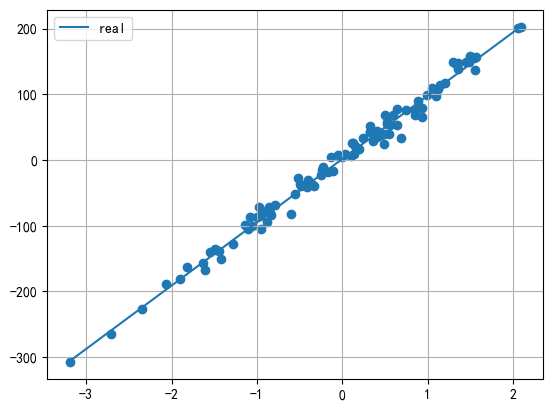

In [17]:
x,y,coef=create_dataset()
plt.scatter(x,y)
x=torch.linspace(x.min(),x.max(),2)
y1=torch.tensor([v*coef+1.5 for v in x])
plt.plot(x,y1,label='real')
plt.grid()  # 格子
plt.legend() # 图例
plt.show()

In [26]:
x,y,coef=create_dataset()
dataset=TensorDataset(x,y)
dataloader=DataLoader(dataset,batch_size=16,shuffle=True) # 创建数据集
device='cuda' 
model=nn.Linear(in_features=1,out_features=1)  # 创建模型
model.to(device)
criterion=nn.MSELoss()  # 损失函数  
optimizer=optim.SGD(model.parameters(),lr=0.02) # 优化器


torch.Size([100, 1])
torch.Size([100])
torch.float32
torch.float32
96.26741385244615


In [27]:
epochs=100
# 损失的变化
loss_epoch=[]
total_loss=0.0
train_sample=0.0
for _ in range(epochs):
    for train_x,train_y in dataloader:
        train_x,train_y=train_x.to(device),train_y.to(device)
        y_pred=model(train_x)
        # print(y_pred.shape)
        # print(train_y.shape)  # 前向传播
        loss=criterion(y_pred,train_y.reshape(-1,1).type(torch.float32)) # 计算损失
        total_loss+=loss.item()
        train_sample+=len(train_y)
        
        # 梯度清零
        optimizer.zero_grad()
        
        # 自动微分（反向传播）
        loss.backward()
        
        # 更新参数
        optimizer.step()
    
    loss_epoch.append(total_loss/train_sample) 

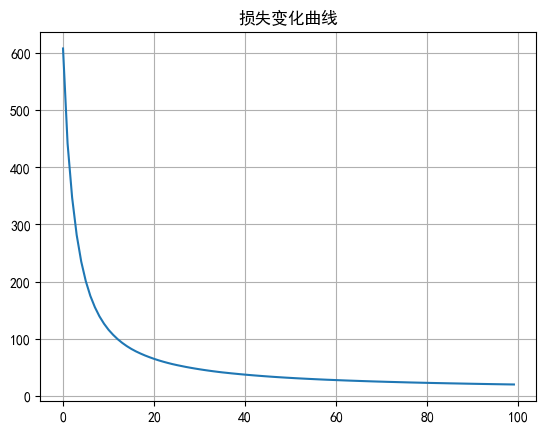

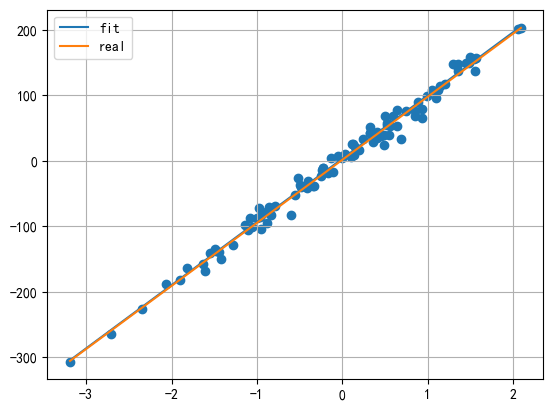

In [28]:
plt.plot(range(epochs),loss_epoch)
plt.title('损失变化曲线')
plt.grid()
plt.show()

# 绘制拟合曲线
plt.scatter(x,y)
x=torch.linspace(x.min(),x.max(),2)
y1=torch.tensor([v*model.weight.item()+model.bias.item() for v in x])
y2=torch.tensor([v*coef+1.5 for v in x])
plt.plot(x,y1,label='fit')
plt.plot(x,y2,label='real')
plt.grid()
plt.legend()
plt.show() 

In [29]:
print(model.weight,model.bias)

Parameter containing:
tensor([[96.4975]], device='cuda:0', requires_grad=True) Parameter containing:
tensor([3.1498], device='cuda:0', requires_grad=True)
